<a href="https://colab.research.google.com/github/vilcagamarracf/Python_Snippets/blob/main/Snippets/Snippets_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Snippets - Colaboratory 

<center>
  <img src='https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg' alt='Numpy logo' width='400'/>
</center>

**Referencias principales**
 
- Página Oficial de Numpy: https://numpy.org/doc/stable/index.html 




# Snippets 

**Revisando documentación**
- [numpy.ndarray.tolist](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html?highlight=ndarray%20tolist#numpy-ndarray-tolist)
- [numpy.ndarray.flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html#numpy-ndarray-flatten)

# Aplicaciones

###### Elaborando boxplots

Lo que se ha realizado:
1. Correr función `R_n` 
1. Según la imagen que se desee obtener información (en este caso NDVI), elegir una zona tipo rectángulo para extraer datos de pixeles -> almacenar como `np.array`
  1. El `np.array` presenta la forma (# de filas, # de columnas)
  1. Convertirlo en 1D con `.flatten('C')` [`numpy.ndarray.flatten`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html#numpy-ndarray-flatten) 
  1. Como se encuentra en 1D, el array casi equivale a ser una lista, para volverlo lista es necesario aplicar [`numpy.ndarray.tolist`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html?highlight=ndarray%20tolist#numpy-ndarray-tolist)
  1. Almacenar las listas obtenidas en otras listas
1. Usar `ptl.boxplot` con datos de las listas almacenadas en `lista_ndvi_boxplot`

In [ ]:
lista_dates = []
lista_ndvi_boxplot = []

for id in ids:
    
  # Imagen Landsat
  img_id = id
  img_ee = ee.Image(img_id).clip(roi)
  img_toa = convert_RAW_to_TOA(img_ee)
  img_date = img_ee.date().format('YYYY-MM-dd').getInfo()
  lista_dates.append(img_date)

  # Radiación Neta
  R_n, img_sr_tasumi, img_productos, d2, doy = getRadiacionNeta(img_ee, roi, dem) # roi: Ferreñafe

  # Imágenes
  img_ndvi = img_productos.select('NDVI')

  # Convertir ee.Image a numpy.array
  img_ndvi_reproj = img_ndvi.reproject(crs='EPSG:32717', scale=30)
  prueba = img_ndvi.sampleRectangle(region=predios_bound, defaultValue=0)
  # prueba.get('B5').getInfo()#.get('NDVI')

  array = np.array(prueba.get('B5').getInfo())
  lista_prueba = array.flatten('C').tolist() # https://www.javatpoint.com/numpy-flatten
  lista_ndvi_boxplot.append(lista_prueba)

  print(f'Rn de imagen {img_date} procesada!')  

Rn de imagen 2021-12-12 procesada!
Rn de imagen 2022-01-13 procesada!
Rn de imagen 2022-01-29 procesada!
Rn de imagen 2022-03-10 procesada!
Rn de imagen 2022-04-03 procesada!


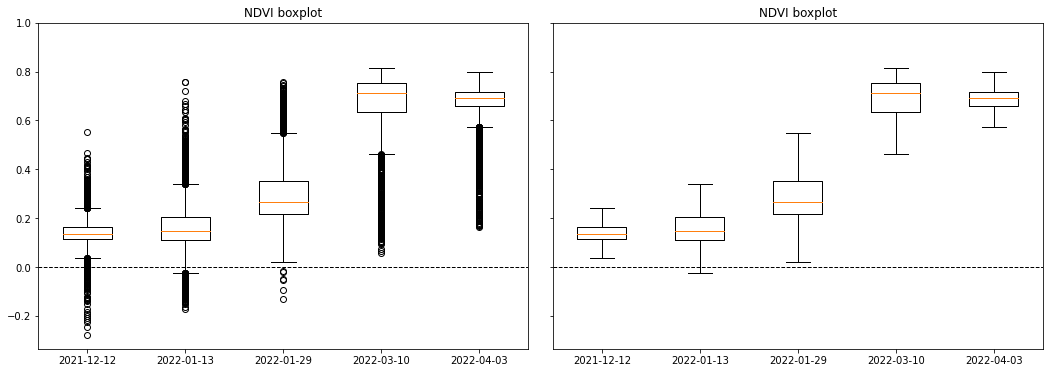

In [ ]:
# Boxplot NDVI
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True) # 
axs[0].boxplot(lista_ndvi_boxplot,
            labels=lista_dates,
            # showfliers=False
            )
axs[0].set_title('NDVI boxplot')
axs[0].set_ylim(top=1)
axs[0].axhline(0, color='k', ls='--', lw=1)

axs[1].boxplot(lista_ndvi_boxplot,
            labels=lista_dates,
            showfliers=False,
            )
axs[1].set_title('NDVI boxplot')
axs[1].set_ylim(top=1)
axs[1].axhline(0, color='k', ls='--', lw=1)

fig.subplots_adjust(wspace=0.05)#hspace=2)
plt.show()

###### Próxima aplicación aquí...